# Using raster files to generate eye-catching visualisations with Matplotlib

<p>Forests and vegetation have always been central to the survival of humans on earth. They provide the air we breathe, the food we eat and the materials used to construct our homes. Thanks to loads of fascinating research projects, there are several open source datasets illustrating the distribution of forests and vegetation on earth. With the magic of Python we can take these datasets, analyse them, manipulate them and use them to generate insightful and eye-catching visualisations</p>

### Dependencies

<code>rasterio</code>
<code>rioxarray</code>

In [4]:
import rasterio
import numpy as np
from rasterio.crs import CRS

forests_file = rasterio.open('gm_ve_v1/gm_ve_v1.tif')
forests = forests_file.read()

print(np.amin(forests))
print(np.amax(forests))
print(len(np.unique(forests)))

0
254
102


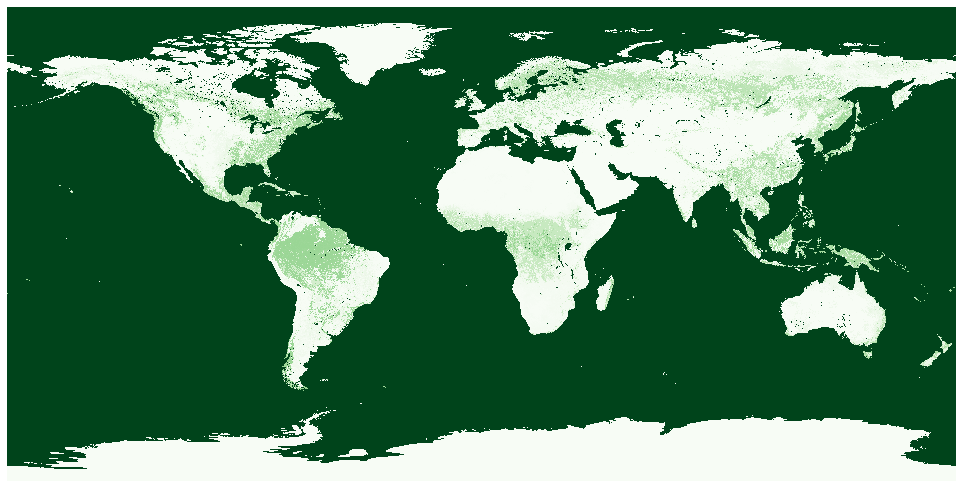

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = plt.axes()
fig.set_size_inches(17, 10.5)

imgs = plt.imshow(forests[0],
                  cmap='Greens',
                  interpolation='nearest')

ax.axis('off')
plt.show()

<p>For the purpose of this exercise, we are going to assume that oceans have 0% tree coverage, which is probably a pretty safe assumption but at the very least worth mentioning, and hence, in the code below, all values greater than 100 are changed to 0. So in subsequent plots, there will be 101 values (0–100) and the colourmap will map perfectly to the lowest (areas with 0 forest cover and water bodies) to the highest (100% forest cover) values.

I want to set a custom background colour for gridpoints with 0 forest cover so we use the code below to generate a colourmap with 101 colours, replace the first colour with our custom value and then create a new colourmap from that list of colours.

To create a colourmap from a list of colours we can use the ListedColormap method which takes a list of colours and generates a colourmap from those colours. As the data is a linear range of value between 0–100 we don’t need to worry about boundaries and we can use a colourmap without normalising the colourmap
</p>

In [6]:
from matplotlib.colors import ListedColormap
from matplotlib import cm

forests[0][forests[0] == 254] = 0.0

ourcmap = cm.get_cmap('Greens', 101)
newcolors = ourcmap(np.linspace(0, 1, 101))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_colour
newcmp_forests = ListedColormap(newcolors)

<p>The colourmap can then be applied to the plotting code generated earlier. There are a few additions here though, the axes have been turned off to make the plot look more artistic and the edges of the plot have been clipped to reduce the amount of white space. These are style changes which anyone attempting this tutorial can and indeed are encouraged to ignore. Data visualisation should be as much about expression than science and hence everyone should develop their own style.
</p>

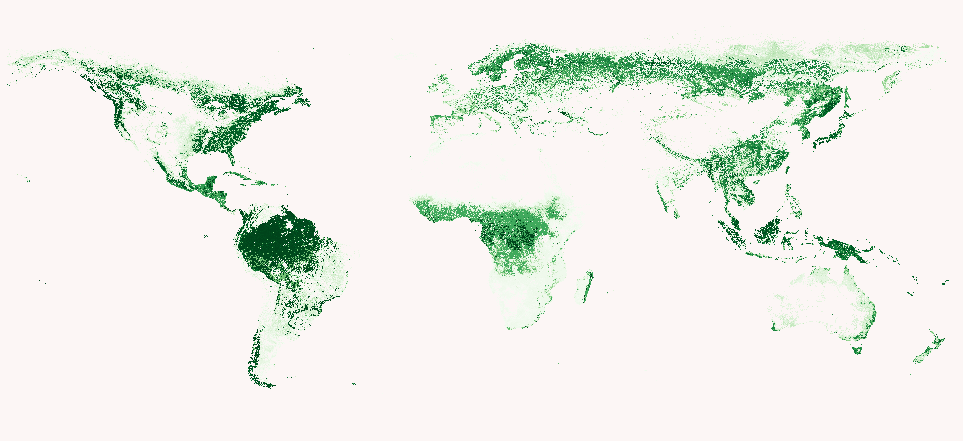

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='#FCF6F5FF')
ax = plt.axes()
fig.set_size_inches(17, 10.5)
ax.patch.set_facecolor('#FCF6F5FF')

imgs = plt.imshow(forests[0],
                  cmap=newcmp_forests,
                  interpolation='nearest')

ax.set_xlim(2000, 43500)
ax.set_ylim(19500, 800)
ax.axis('off')
plt.show()

<p>Reprojecting geospatial shapes like points and polygons is trivial but unfortunately doing the same with raster data is more challenging. To accomplish this we can us rioxarray. rioxarray extends xarray with the rio accessor and allows rasters from tiff and geotiff files to be clipped, merged and reprojected. Below, the original tif file is opened with rioxarray (it leverages some underlying rasterio functionality, hence the open_rasterio method), the Robinson projection is defined as a rasterio.CRS object and then the raster is reprojected onto this CRS. One thing to note, therasterio.CRS object is created from a pyproj string. pyproj is a fantastic library that deals with cartographic projections and coordinate transformations 
</p>